In [4]:
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.read()
    return data

In [5]:
import os
def get_dir_count(dir_path):
    try:
        count = 0
        with os.scandir(dir_path) as entries: 
            for entry in entries: 
                if entry.is_file(): 
                    count += 1
        return count
    except FileNotFoundError: 
        print(f"文件夹 {dir_path} 不存在")
        return None

In [6]:
raw_data = ""
cleaned_data = ""
cleaned_data_plus = ""

In [7]:
dir_path = r"E:\paper\data"
dir_count = get_dir_count(dir_path)
for i in range(1, dir_count + 1):
    raw_data += load_data(r"E:\paper\data\data_" + str(i) + ".txt")

KeyboardInterrupt: 

In [ ]:
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.read()
    return data[1:]

In [ ]:
def load_data_line(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.readlines()
    return ''.join(data[2:-1])

In [ ]:
dir_path = r"E:\paper\data"
dir_count = get_dir_count(dir_path)
for i in range(1, dir_count + 1):
    cleaned_data += load_data_line(r"E:\paper\data\data_" + str(i) + ".txt")

In [ ]:
import re
import os

def remove_ads_from_novel(file_path, output_path):
    """
    读取txt小说并去除广告
    
    Args:
        file_path: 小说文件路径
        output_path: 输出文件路径，默认为原文件名_clean.txt
    """
    
    # 常见的广告关键词
    ad_keywords = [
        # 标题
        '正文','VIP卷',
        
        # 网站相关
        '小说网', '文学网', 'txt下载', '最新章节', '无弹窗',
        '请记住本站', '域名', 'www.', '.com', '.net',
        '笔趣阁', '顶点小说', '起点中文网',
        
        # 下载相关
        '下载地址', '免费下载', 'TXT下载', '精校版',
        
        # 推广相关
        '推荐好友', '分享给朋友', '求收藏', '求推荐', '求月票',
        '打赏', '订阅', 'QQ群', '微信群', '微信公众号','推荐票','月票',
        
        # 章节标题中的广告
        '章节目录', '正文卷', '作品相关',
        
        # 其他
        '广告', '推广', '赞助', '碧曲书库', '高速文字手打',
    ]
    
    try:
        # 检测文件编码
        encodings = ['utf-8', 'gbk', 'gb2312', 'gb18030']
        content = None
        used_encoding = None
        
        for encoding in encodings:
            try:
                with open(file_path, 'r', encoding=encoding) as file:
                    content = file.read()
                used_encoding = encoding
                # print(f"成功读取文件，编码: {encoding}")
                break
            except UnicodeDecodeError:
                continue
        
        if content is None:
            print("无法识别文件编码，尝试使用utf-8并忽略错误")
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
            used_encoding = 'utf-8'
        
        original_lines = content.split('\n')
        clean_lines = []
        
        # 过滤广告行
        for line in original_lines:
            line = line.strip()
            if not line:  # 保留空行
                clean_lines.append('')
                continue
                
            # 检查是否包含广告关键词
            is_ad = False
            for keyword in ad_keywords:
                if keyword in line:
                    is_ad = True
                    break
            
            # 检查是否是网址
            if re.search(r'https?://[^\s]+', line) or re.search(r'www\.[^\s]+', line):
                is_ad = True
            
            # 检查是否是纯数字或特殊字符行
            if re.match(r'^[\d\s\-_=*]+$', line):
                is_ad = True
            
            if not is_ad:
                clean_lines.append(line)
        
        # 写入清理后的内容
        with open(output_path, 'w', encoding=used_encoding) as file:
            file.write('\n'.join(clean_lines))
        
        if len(original_lines) - len(clean_lines) > 3:
            print(f"文件{file_path}删除了 {len(original_lines) - len(clean_lines)} 行广告")
        # print(f"广告清理完成！")
        # print(f"原始行数: {len(original_lines)}")
        # print(f"清理后行数: {len(clean_lines)}")
        # print(f"清理文件保存至: {output_path}")
        
        return ''.join(clean_lines)
        
    except FileNotFoundError:
        print(f"文件未找到: {file_path}")
        return None
    except Exception as e:
        print(f"处理文件时出错: {e}")
        return None

# 使用示例
if __name__ == "__main__":
    dir_path = r"E:\paper\data"
    dir_count = get_dir_count(dir_path)
    for i in range(1, dir_count + 1):
        file_path = r"E:\paper\data\data_" + str(i) + ".txt"
        output_path = r"E:\paper\cleaned_data\data_" + str(i) + "_clean.txt"
        cleaned_data += remove_ads_from_novel(file_path, output_path)

文件E:\paper\data\data_57.txt删除了 4 行广告
文件E:\paper\data\data_129.txt删除了 4 行广告
文件E:\paper\data\data_243.txt删除了 4 行广告
文件E:\paper\data\data_245.txt删除了 5 行广告
文件E:\paper\data\data_304.txt删除了 4 行广告
文件E:\paper\data\data_307.txt删除了 5 行广告
文件E:\paper\data\data_497.txt删除了 4 行广告
文件E:\paper\data\data_527.txt删除了 9 行广告
文件E:\paper\data\data_539.txt删除了 8 行广告
文件E:\paper\data\data_543.txt删除了 7 行广告
文件E:\paper\data\data_655.txt删除了 4 行广告
文件E:\paper\data\data_764.txt删除了 4 行广告
文件E:\paper\data\data_820.txt删除了 4 行广告
文件E:\paper\data\data_888.txt删除了 4 行广告
文件E:\paper\data\data_909.txt删除了 7 行广告
文件E:\paper\data\data_978.txt删除了 4 行广告
文件E:\paper\data\data_993.txt删除了 4 行广告
文件E:\paper\data\data_997.txt删除了 4 行广告
文件E:\paper\data\data_1176.txt删除了 5 行广告
文件E:\paper\data\data_1187.txt删除了 4 行广告
文件E:\paper\data\data_1206.txt删除了 5 行广告
文件E:\paper\data\data_1208.txt删除了 4 行广告
文件E:\paper\data\data_1254.txt删除了 4 行广告
文件E:\paper\data\data_1281.txt删除了 4 行广告
文件E:\paper\data\data_1283.txt删除了 4 行广告
文件E:\paper\data\data_1287.txt删除了 4 行广告
文件E:\

In [ ]:
dir_path = r"E:\paper\data"
dir_count = get_dir_count(dir_path)
for i in range(1, dir_count + 1):
    cleaned_data += load_data_line(r"E:\paper\data\data_" + str(i) + ".txt")

In [ ]:
dir_path_cleaned = r"E:\paper\cleaned_data"
dir_count = get_dir_count(dir_path_cleaned)
for i in range(1, dir_count + 1):
    cleaned_data_plus += load_data_line(r"E:\paper\cleaned_data\data_" + str(i) + "_clean.txt")

In [ ]:
print("章节数：" + str(dir_count))
print("处理前总字数：" + str(len(raw_data)))
print("规律处理后总字数：" + str(len(cleaned_data)))
print("正则化处理后总字数：" + str(len(cleaned_data_plus)))


章节数：1623
处理前总字数：5313319
通过规律处理后总字数：5178527
经过正则化处理后总字数：5043465


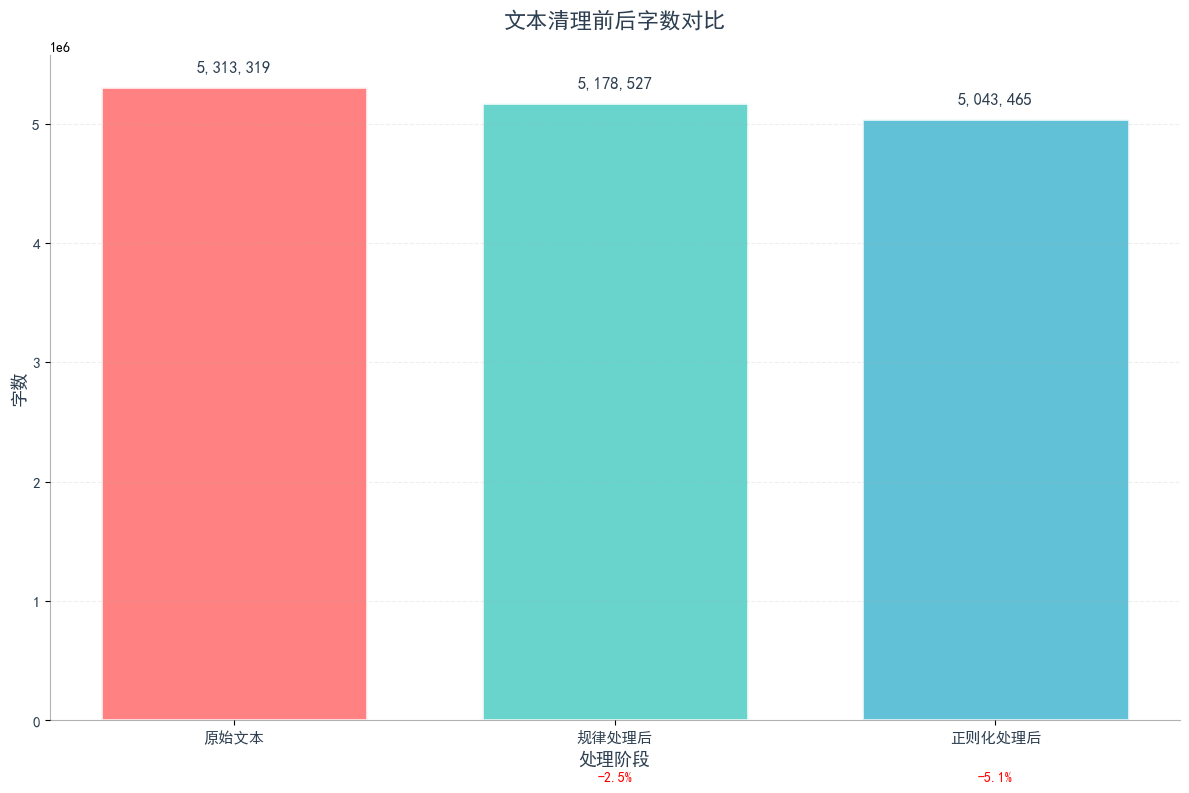

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
stages = ['原始文本', '规律处理后', '正则化处理后']
word_counts = [len(raw_data), len(cleaned_data), len(cleaned_data_plus)]

# 创建图形
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# 使用更现代的配色方案
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(stages, word_counts, color=colors, 
               edgecolor='white', linewidth=2, alpha=0.85, 
               width=0.7)

# 添加数值标签（美化版）
for bar, count in zip(bars, word_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(word_counts)*0.02, 
            f'{count:,}', ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='#2C3E50')

# 美化标题和标签
plt.title('文本清理前后字数对比', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
plt.ylabel('字数', fontsize=13, fontweight='bold', color='#2C3E50')
plt.xlabel('处理阶段', fontsize=13, fontweight='bold', color='#2C3E50')

# 美化坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

# 网格美化
plt.grid(axis='y', alpha=0.2, linestyle='--')

# 设置y轴格式
ax.tick_params(axis='both', which='major', labelsize=11)
plt.xticks(color='#2C3E50')
plt.yticks(color='#2C3E50')

# 添加百分比变化标注（可选）
if len(word_counts) >= 2:
    for i in range(1, len(word_counts)):
        change_pct = (word_counts[i] - word_counts[0]) / word_counts[0] * 100
        ax.text(bars[i].get_x() + bars[i].get_width()/2, -max(word_counts)*0.08,
               f'{change_pct:+.1f}%', ha='center', va='top', 
               fontsize=10, fontweight='bold', 
               color='green' if change_pct >= 0 else 'red')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
import json


def load_json_data(json_data_path):
    with open(json_data_path, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)
    return raw_data

In [ ]:
# 统计对话条数
raw_json_data_path = r"E:\paper\train_data\train_data_filtered.json"
json_data_path = r"E:\paper\train_data\train_data.json"
raw_data = load_json_data(raw_json_data_path)
data = load_json_data(json_data_path)
raw_conversation_count = len(raw_data)
conversation_count = len(data)
print(f"筛选前总共有 {raw_conversation_count} 条对话数据")
print(f"筛选后总共有 {conversation_count} 条对话数据")

筛选前总共有 307 条对话数据
筛选后总共有 299 条对话数据


In [ ]:
len(raw_data[0]['conversations'])

19

In [ ]:
# 如果需要更详细的分析，可以统计每个对话中的消息数量
raw_count = 0
for i, conversation in enumerate(raw_data, 1):
    message_count = len(conversation["conversations"])
    # if message_count > 3: 
    #     print(f"对话 {i}: 包含 {message_count} 条消息")
    raw_count += message_count
print(f"总消息数: {raw_count} 条")

总消息数: 2129 条


In [ ]:
data = load_json_data(json_data_path)
count = 0
for i, conversation in enumerate(data, 1):
    message_count = len(conversation["conversations"])
    if message_count < 2: 
        print(f"对话 {i}: 包含 {message_count} 条消息")
        print(conversation['source_file'])
    for j in range(message_count):
        if conversation['conversations'][j]['role'] == 'assistant' and len(conversation['conversations'][j]['content']) <= 3:
            print(f"对话 {conversation['source_file']}: 第 {j} 条消息长度小于 3")
    count += message_count - 1
print(f"总消息数: {count} 条")

总消息数: 1601 条


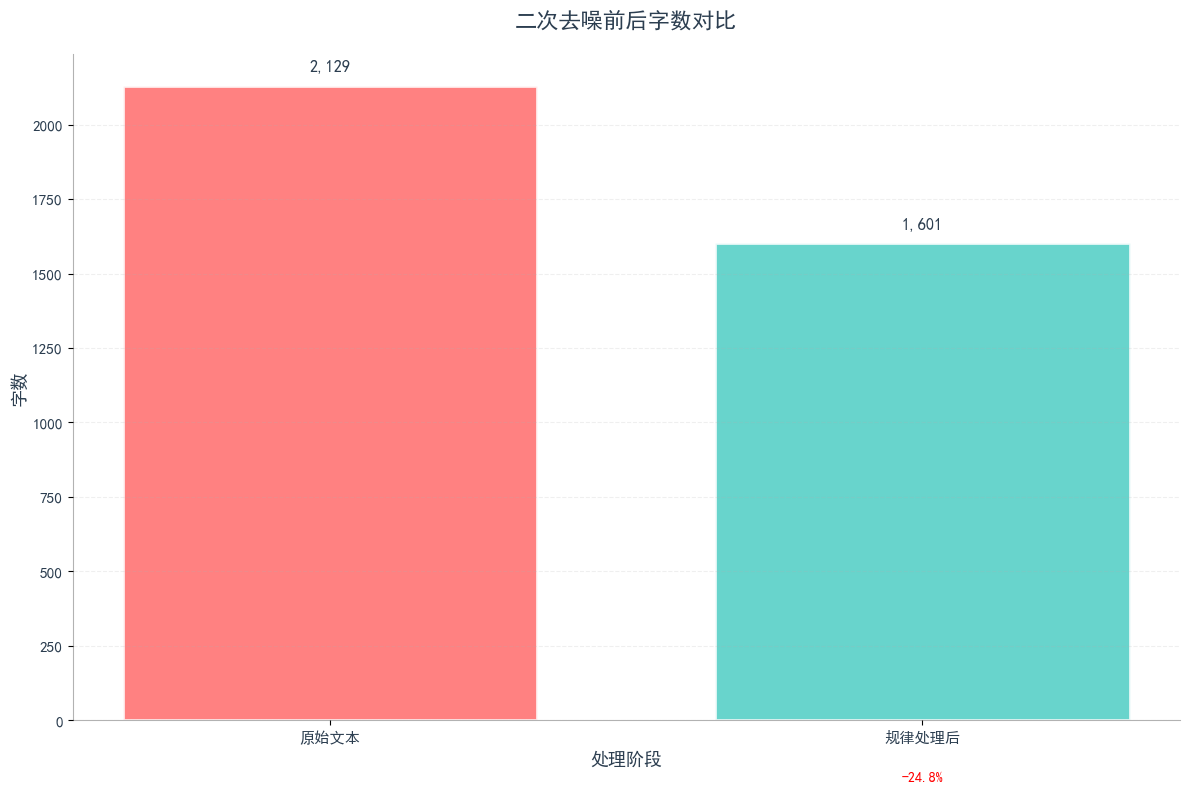

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
stages = ['原始文本', '规律处理后']
word_counts = [raw_count, count]

# 创建图形
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# 使用更现代的配色方案
colors = ['#FF6B6B', '#4ECDC4']
bars = plt.bar(stages, word_counts, color=colors, 
               edgecolor='white', linewidth=2, alpha=0.85, 
               width=0.7)

# 添加数值标签（美化版）
for bar, count in zip(bars, word_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(word_counts)*0.02, 
            f'{count:,}', ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='#2C3E50')

# 美化标题和标签
plt.title('二次去噪前后字数对比', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
plt.ylabel('字数', fontsize=13, fontweight='bold', color='#2C3E50')
plt.xlabel('处理阶段', fontsize=13, fontweight='bold', color='#2C3E50')

# 美化坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

# 网格美化
plt.grid(axis='y', alpha=0.2, linestyle='--')

# 设置y轴格式
ax.tick_params(axis='both', which='major', labelsize=11)
plt.xticks(color='#2C3E50')
plt.yticks(color='#2C3E50')

# 添加百分比变化标注（可选）
if len(word_counts) >= 2:
    for i in range(1, len(word_counts)):
        change_pct = (word_counts[i] - word_counts[0]) / word_counts[0] * 100
        ax.text(bars[i].get_x() + bars[i].get_width()/2, -max(word_counts)*0.08,
               f'{change_pct:+.1f}%', ha='center', va='top', 
               fontsize=10, fontweight='bold', 
               color='green' if change_pct >= 0 else 'red')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
import json

def load_json_data(file_path):
    """加载JSON数据"""
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

def save_json_data(data, file_path):
    """保存JSON数据"""
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)

# 主程序
json_data_path2 = r"E:\paper\train_data\train_data2.0.json"
output_path = r"E:\paper\train_data\test.json"

# 加载数据
data = load_json_data(json_data_path2)
filtered_data = []
removed_count = 0
short_message_count = 0

print("开始过滤数据...")

for i, conversation in enumerate(data, 1):
    # 检查对话轮次是否足够
    message_count = len(conversation["conversations"])
    if message_count < 2:
        print(f"跳过对话 {i} (文件: {conversation.get('source_file', '未知')}): 包含 {message_count} 条消息，轮次不足")
        removed_count += 1
        continue
    
    # 创建新的对话结构，复制原始对话的元数据
    new_conversation = {
        "conversations": [],
        "source_file": conversation.get('source_file', '')
        # 如果有其他元数据字段，也需要在这里复制
    }
    
    # 复制除了source_file之外的其他所有字段
    for key, value in conversation.items():
        if key not in ["conversations", "source_file"]:
            new_conversation[key] = value
    
    has_short_message = False
    skip_current = False
    
    # 遍历对话中的每一对消息（用户+助理）
    j = 0
    while j < message_count - 1:
        user_msg = conversation["conversations"][j]
        assistant_msg = conversation["conversations"][j + 1]
        
        # 检查角色顺序是否正确（用户->助理）
        if user_msg['role'] == 'user' and assistant_msg['role'] == 'assistant':
            # 检查助理回复长度
            if len(assistant_msg['content'].strip()) < 8:
                print(f"对话 {i} (文件: {conversation.get('source_file', '未知')}): 发现短助理回复 '{assistant_msg['content']}'，移除该轮对话")
                short_message_count += 1
                # 跳过这一对消息（不添加到新对话中）
                j += 2
                continue
            else:
                # 助理回复长度合格，保留这一对消息
                new_conversation["conversations"].append(user_msg)
                new_conversation["conversations"].append(assistant_msg)
                j += 2
        else:
            # 角色顺序不正确，按顺序处理单条消息
            new_conversation["conversations"].append(conversation["conversations"][j])
            j += 1
    
    # 处理最后一条消息（如果存在）
    if j < message_count:
        new_conversation["conversations"].append(conversation["conversations"][j])
    
    # 检查过滤后的对话是否还有有效轮次
    if len(new_conversation["conversations"]) >= 2:
        filtered_data.append(new_conversation)
    else:
        print(f"对话 {i} (文件: {conversation.get('source_file', '未知')}): 过滤后无有效对话轮次，完全移除")
        removed_count += 1

# 保存过滤后的数据
save_json_data(filtered_data, output_path)

# 统计最终结果
final_total_messages = 0
for conversation in filtered_data:
    final_total_messages += len(conversation["conversations"]) - 1

print(f"\n过滤完成!")
print(f"原始对话数量: {len(data)}")
print(f"过滤后对话数量: {len(filtered_data)}")
print(f"移除的对话数量: {removed_count}")
print(f"发现的短消息数量: {short_message_count}")
print(f"总有效消息轮次: {final_total_messages}")
print(f"已保存到: {output_path}")

开始过滤数据...
对话 24 (文件: data_108.txt): 发现短助理回复 '魔兽山脉。'，移除该轮对话
对话 32 (文件: data_123.txt): 发现短助理回复 '呵呵。也是…'，移除该轮对话
对话 32 (文件: data_123.txt): 发现短助理回复 '把手伸出来。'，移除该轮对话
对话 33 (文件: data_127.txt): 发现短助理回复 '嘿嘿...'，移除该轮对话
对话 47 (文件: data_156.txt): 发现短助理回复 '先看看吧。'，移除该轮对话
对话 78 (文件: data_221.txt): 发现短助理回复 '呵呵。知道了！'，移除该轮对话
对话 80 (文件: data_224.txt): 发现短助理回复 '随你吧。'，移除该轮对话
对话 84 (文件: data_229.txt): 发现短助理回复 '吞下去…'，移除该轮对话
对话 87 (文件: data_234.txt): 发现短助理回复 '我说够了！'，移除该轮对话
对话 88 (文件: data_235.txt): 发现短助理回复 '两个月。'，移除该轮对话
对话 91 (文件: data_239.txt): 发现短助理回复 '知道了。'，移除该轮对话
对话 106 (文件: data_374.txt): 发现短助理回复 '嗯。也好。'，移除该轮对话
对话 107 (文件: data_378.txt): 发现短助理回复 '应该可以。'，移除该轮对话
对话 107 (文件: data_378.txt): 发现短助理回复 '陨落心炎！'，移除该轮对话
对话 114 (文件: data_393.txt): 发现短助理回复 '嗯...'，移除该轮对话
对话 117 (文件: data_396.txt): 发现短助理回复 '阴阳玄龙丹！？'，移除该轮对话
对话 131 (文件: data_484.txt): 发现短助理回复 '青木仙藤！'，移除该轮对话
对话 131 (文件: data_484.txt): 过滤后无有效对话轮次，完全移除
对话 137 (文件: data_511.txt): 发现短助理回复 '嗯，随你。'，移除该轮对话
对话 139 (文件: data_513.txt): 发现短助理回复 '怎么？动心了？'，移除该轮对话
对话 21

In [ ]:
json_data_path2 = r"E:\paper\train_data\train_data2.0.json"
data = load_json_data(json_data_path2)
count = 0
for i, conversation in enumerate(data, 1):
    message_count = len(conversation["conversations"])
    if message_count < 2: 
        print(f"对话 {i}: 包含 {message_count} 条消息")
        print(conversation['source_file'])
    for j in range(message_count):
        if conversation['conversations'][j]['role'] == 'assistant' and len(conversation['conversations'][j]['content']) <= 5:
            print(f"对话 {conversation['source_file']}: 第 {j} 条消息长度小于 5")
            print(conversation['conversations'][j]['content'])
    count += message_count - 1
print(f"总消息数: {count} 条")

对话 data_108.txt: 第 2 条消息长度小于 5
魔兽山脉。
对话 data_127.txt: 第 2 条消息长度小于 5
嘿嘿...
对话 data_156.txt: 第 6 条消息长度小于 5
先看看吧。
对话 data_224.txt: 第 6 条消息长度小于 5
随你吧。
对话 data_229.txt: 第 2 条消息长度小于 5
吞下去…
对话 data_234.txt: 第 4 条消息长度小于 5
我说够了！
对话 data_235.txt: 第 14 条消息长度小于 5
两个月。
对话 data_239.txt: 第 6 条消息长度小于 5
知道了。
对话 data_374.txt: 第 6 条消息长度小于 5
嗯。也好。
对话 data_378.txt: 第 8 条消息长度小于 5
应该可以。
对话 data_378.txt: 第 14 条消息长度小于 5
陨落心炎！
对话 data_393.txt: 第 10 条消息长度小于 5
嗯...
对话 data_484.txt: 第 2 条消息长度小于 5
青木仙藤！
对话 data_511.txt: 第 6 条消息长度小于 5
嗯，随你。
对话 data_1377.txt: 第 8 条消息长度小于 5
默然...
对话 data_1422.txt: 第 2 条消息长度小于 5
斗圣手臂？
对话 data_1430.txt: 第 6 条消息长度小于 5
微笑点头
对话 data_1443.txt: 第 10 条消息长度小于 5
纳兰嫣然。
对话 data_1565.txt: 第 2 条消息长度小于 5
嗯...
对话 data_1378.txt: 第 6 条消息长度小于 5
加大火力。
对话 data_1379.txt: 第 8 条消息长度小于 5
净莲妖圣！
对话 data_1485.txt: 第 2 条消息长度小于 5
二星斗圣。
对话 data_1502.txt: 第 2 条消息长度小于 5
我没事。
对话 data_1562.txt: 第 2 条消息长度小于 5
一月之后。
总消息数: 1597 条


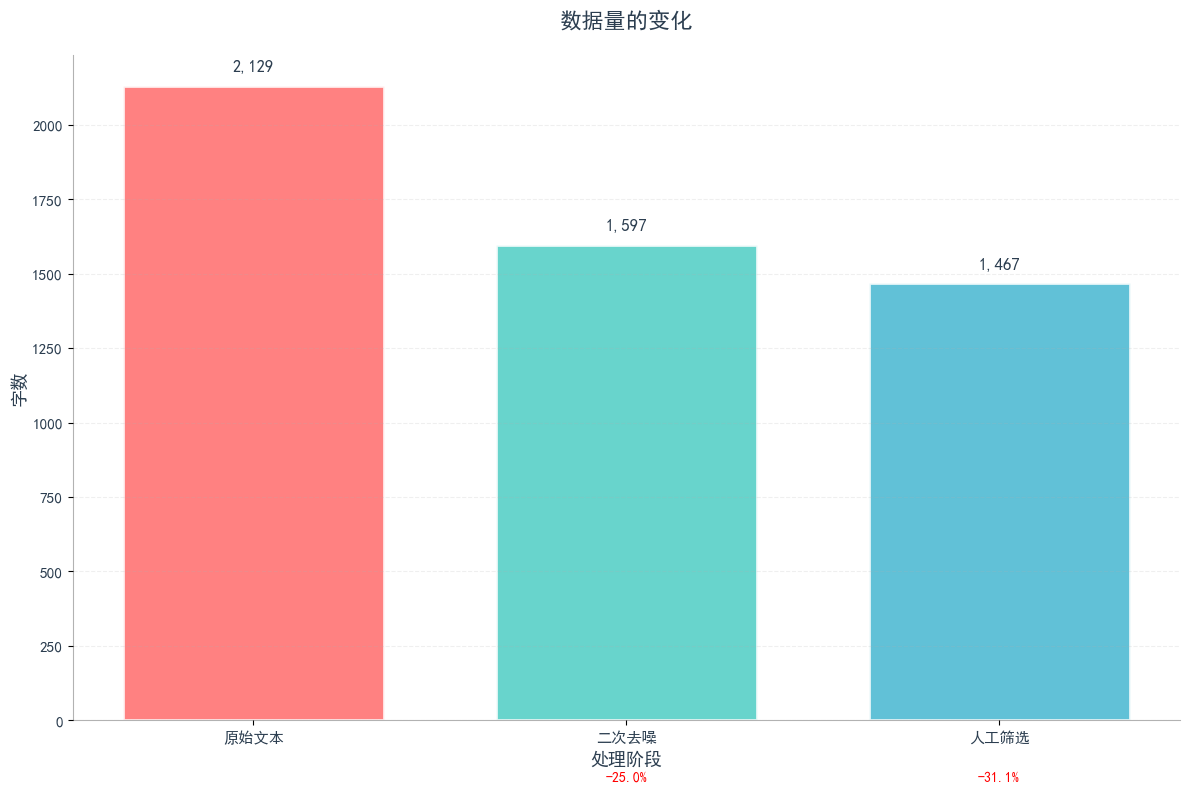

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
stages = ['原始文本', '二次去噪', '人工筛选']
word_counts = [raw_count, count, final_total_messages]

# 创建图形
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# 使用更现代的配色方案
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(stages, word_counts, color=colors, 
               edgecolor='white', linewidth=2, alpha=0.85, 
               width=0.7)

# 添加数值标签（美化版）
for bar, count in zip(bars, word_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(word_counts)*0.02, 
            f'{count:,}', ha='center', va='bottom', 
            fontsize=12, fontweight='bold', color='#2C3E50')

# 美化标题和标签
plt.title('数据量的变化', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
plt.ylabel('字数', fontsize=13, fontweight='bold', color='#2C3E50')
plt.xlabel('处理阶段', fontsize=13, fontweight='bold', color='#2C3E50')

# 美化坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_alpha(0.3)

# 网格美化
plt.grid(axis='y', alpha=0.2, linestyle='--')

# 设置y轴格式
ax.tick_params(axis='both', which='major', labelsize=11)
plt.xticks(color='#2C3E50')
plt.yticks(color='#2C3E50')

# 添加百分比变化标注（可选）
if len(word_counts) >= 2:
    for i in range(1, len(word_counts)):
        change_pct = (word_counts[i] - word_counts[0]) / word_counts[0] * 100
        ax.text(bars[i].get_x() + bars[i].get_width()/2, -max(word_counts)*0.08,
               f'{change_pct:+.1f}%', ha='center', va='top', 
               fontsize=10, fontweight='bold', 
               color='green' if change_pct >= 0 else 'red')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [10]:
import json
def load_json_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
        return data

In [12]:
negative_data_path = r"E:\paper\train_data\negative_data.json"
negative_data = load_json_data(negative_data_path)
len(negative_data)

14